In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.mixture import GaussianMixture

In [25]:
# how to generate a dataset of height and widht for salmon and fish ?

nb_sample = 1000
# let's define our distributions parameters
salmon_w_mu, salmon_w_std = 1.5, 0.3 # kg
salmon_h_mu, salmon_h_std = 50, 0.5# cm
tuna_w_mu, tuna_w_std = 7, 0.7 # kg
tuna_h_mu, tuna_h_std = 100, 1 # kg

In [26]:

salmon_w = np.random.normal(salmon_w_mu, salmon_w_std, nb_sample)
salmon_h = np.random.normal(salmon_h_mu, salmon_h_std, nb_sample)
tuna_w = np.random.normal(tuna_w_mu, tuna_w_std, nb_sample)
tuna_h = np.random.normal(tuna_h_mu, tuna_h_std, nb_sample)

# generate both our 2d dataset

tuna_ds = pd.DataFrame({
                        'heights': tuna_h,
                        'weight': tuna_w, 
                        'type': 't', 
                        })

salmon_ds = pd.DataFrame({
                        'heights': salmon_h,
                        'weight': salmon_w, 
                        'type': 's', 
                        })

fish_data = pd.concat([tuna_ds, salmon_ds])

fish_data.head()

,heights,weight,type
0,101.139820,6.640032,t
1,101.186537,7.611796,t
2,98.152755,6.920761,t
3,100.212742,6.525100,t
4,99.532403,7.964357,t


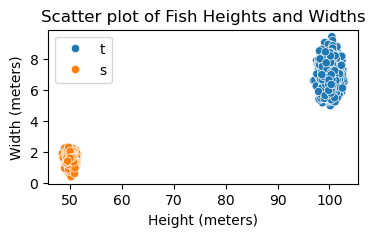

In [27]:
# let's plot our data
# sns.set(style="whitegrid")

# Plot the data
plt.figure(figsize=(4, 2))
sns.scatterplot(data=fish_data, x='heights', y='weight', hue='type')
plt.title('Scatter plot of Fish Heights and Widths')
plt.xlabel('Height (meters)')
plt.ylabel('Width (meters)')
plt.legend()
plt.show()

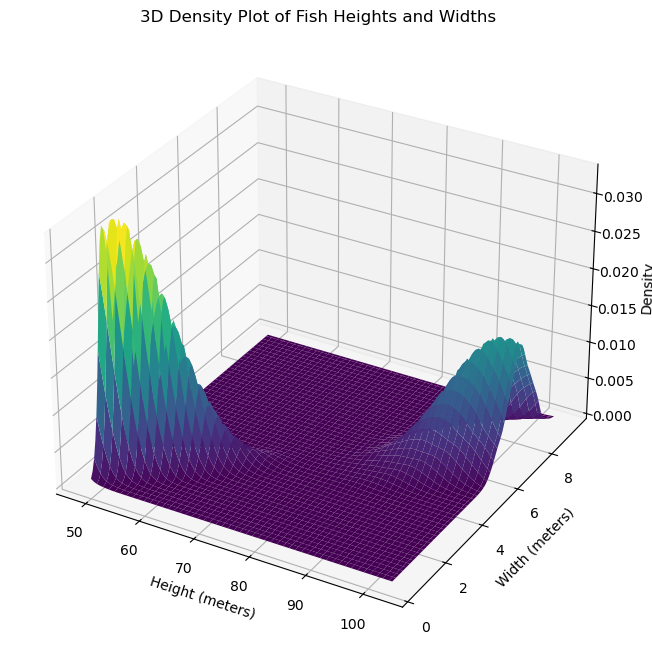

In [28]:
# density plot

x, y = fish_data['heights'].values, fish_data['weight'].values

x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

# Create 3D grid of points
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the 3D density plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_xlabel('Height (meters)')
ax.set_ylabel('Width (meters)')
ax.set_zlabel('Density')
ax.set_title('3D Density Plot of Fish Heights and Widths')

plt.show()

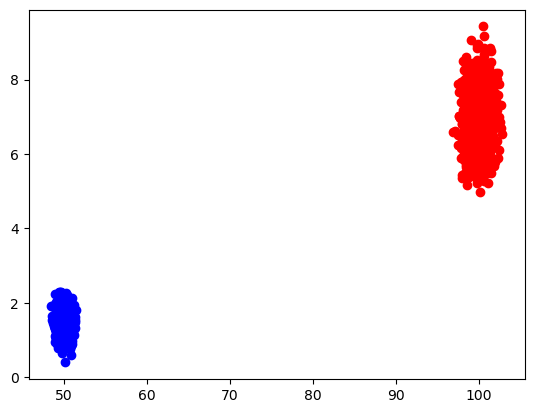

In [40]:

unlabeled_fish_data = fish_data[['heights', 'weight']]

gmm = GaussianMixture(n_components = 2)

gmm.fit(unlabeled_fish_data)

labels = gmm.predict(unlabeled_fish_data)

fish_data['preds'] = labels

pred0 = fish_data[fish_data['preds'] == 0]
pred1 = fish_data[fish_data['preds'] == 1]

plt.scatter(pred0['heights'], pred0['weight'], c = 'red')
plt.scatter(pred1['heights'], pred1['weight'], c = 'blue')